In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 12
A = np.matrix([
    [0, 3, 0, 2, 0, 1, 5, 4, 4, 0, 0, 1],
    [3, 0, 3, 2, 0, 3, 0, 4, 0, 5, 4, 4],
    [0, 3, 0, 0, 0, 0, 2, 0, 4, 1, 4, 5],
    [2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0],
    [1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [5, 0, 2, 1, 0, 0, 0, 4, 4, 0, 0, 5],
    [4, 4, 0, 0, 4, 0, 4, 0, 1, 2, 5, 4],
    [4, 0, 4, 0, 1, 0, 4, 1, 0, 0, 5, 0],
    [0, 5, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0],
    [0, 4, 4, 2, 0, 0, 0, 5, 5, 0, 0, 5],
    [1, 4, 5, 0, 0, 1, 5, 4, 0, 0, 5, 0],
])
G = nx.from_numpy_matrix(A)

In [3]:
def cycle_layout(k):
    pos = {}
    R = 15
    for i in range(k):
        pos[i] = (R * np.sin(2 * i * np.pi / k) ,R * np.cos(2 * i * np.pi / k))
    return pos

In [4]:
def draw_cycle(H):
    pos = cycle_layout(n)
    H.edges(data=True)
    plt.figure(dpi = 96)
    nx.draw(H, pos, with_labels=True)
    plt.show()

In [5]:
print([f"d{i} = {len(G[v])}" for i, v in enumerate(G.nodes())])

['d0 = 7', 'd1 = 8', 'd2 = 6', 'd3 = 5', 'd4 = 2', 'd5 = 3', 'd6 = 6', 'd7 = 8', 'd8 = 6', 'd9 = 4', 'd10 = 6', 'd11 = 7']


In [6]:
T = nx.Graph()

arr = np.random.permutation([i for i in range(n)])
arr = [8, 5, 11, 4, 0, 7, 10, 9, 3, 2, 1, 6]

for v in range(n):
    for u in G[v]:
        T.add_edge(arr[v], arr[u])

Граф 1


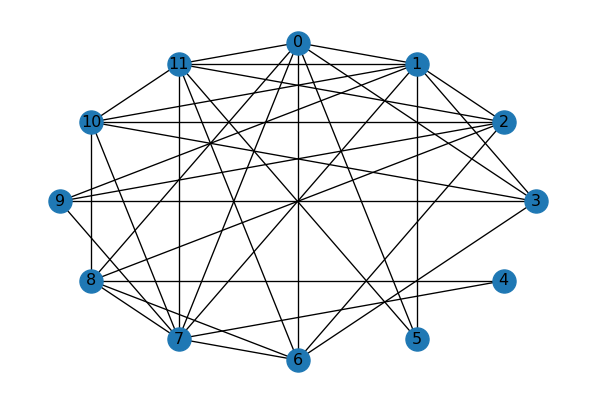

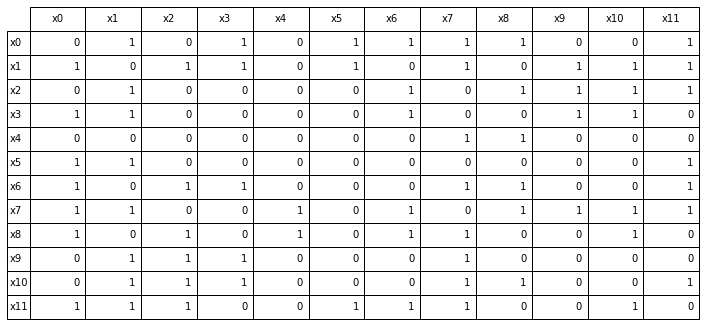

Граф 2


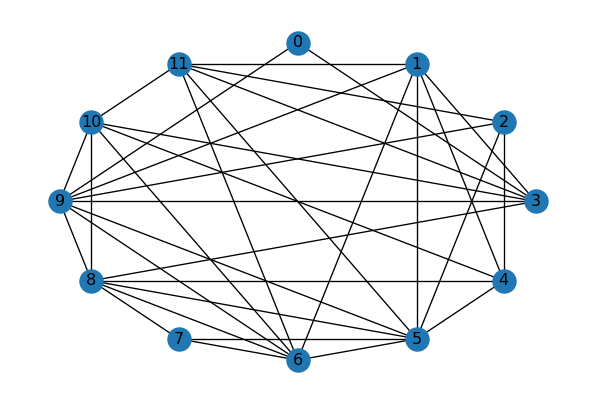

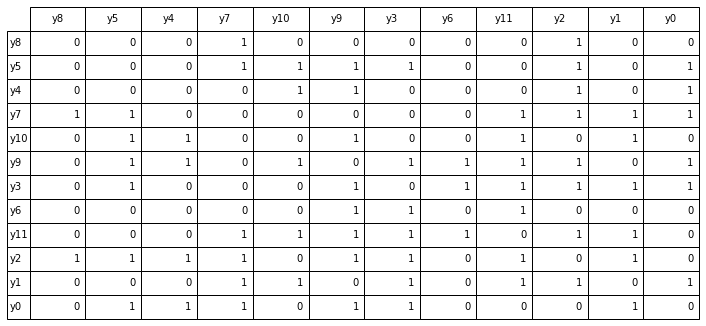

In [7]:
def draw_adjmatrix(H, vlabel):
    fig, ax = plt.subplots(1,1)
    ax.axis('tight')
    ax.axis('off')
    B = [[1 if u in H[v] else 0 for v in range(n)] for u in range(n)]
    table = plt.table(cellText=B,
                      colLabels = [f"{vlabel}{i}" for i in H.nodes()],
                      rowLabels = [f"{vlabel}{i}" for i in H.nodes()], loc="center")
    table.scale(2, 2)
    plt.show()
    
print("Граф 1")
draw_cycle(G)
draw_adjmatrix(G, "x")
print("Граф 2")
draw_cycle(T)
draw_adjmatrix(T, "y")

In [8]:
degs = [[[] for j in range(2)] for i in range(n)]
for v in G.nodes():
    degs[len(G[v])][0].append(v)
for v in T.nodes():
    degs[len(T[v])][1].append(v)

In [9]:
for i, deg in enumerate(degs):
    if len(deg[0]) == 0 and len(deg[1]) == 0:
        continue
    print(f"Вершины со степенью {i}:")
    d0 = [f"x{d}" for d in deg[0]]
    d1 = [f"y{d}" for d in deg[1]]
    print(f"Граф1: {d0}")
    print(f"Граф2: {d1}")

Вершины со степенью 2:
Граф1: ['x4']
Граф2: ['y0']
Вершины со степенью 3:
Граф1: ['x5']
Граф2: ['y7']
Вершины со степенью 4:
Граф1: ['x9']
Граф2: ['y2']
Вершины со степенью 5:
Граф1: ['x3']
Граф2: ['y4']
Вершины со степенью 6:
Граф1: ['x2', 'x6', 'x8', 'x10']
Граф2: ['y10', 'y3', 'y11', 'y1']
Вершины со степенью 7:
Граф1: ['x0', 'x11']
Граф2: ['y8', 'y6']
Вершины со степенью 8:
Граф1: ['x1', 'x7']
Граф2: ['y5', 'y9']


In [10]:
def isomorphic(X, Y, perm):
    return not (False in [X.has_edge(u, v) == Y.has_edge(perm[u], perm[v]) for u in range(n) for v in range(n)])

In [18]:
import itertools as itrt
import sys

#sys.setrecursionlimit(int(1e6))

B = []
BT = []

def rec(i, perm):
    if i == n:
        #print(perm)
        #sys.exit(0)
        if isomorphic(G, T, perm):
            return [v for v in perm]
        return []
    
    x, y = degs[i]
    
    N = len(x)
    M = len(y)
    
    if N != M:
        return []
    
    if N == 0:
        return rec(i + 1, perm)
    
    if N == 1:
        B.append((x[0], y[0]))
        BT.append((f"x{x[0]}", f"y{y[0]}"))
    
    for el in itrt.permutations(y):
        z = list(el)
        for j in range(N):
            p = x[j]
            q = z[j]
            #print(f"{p} -> {q}")
            perm[p] = q                
        
        res = rec(i + 1, perm)
        
        if res != []:
            return res
        
        for j in range(N):
            p = x[j]
            q = z[j]
            perm[p] = p
    return []

Для вершин с уникальной степенью сразу можно установить соответствие:	


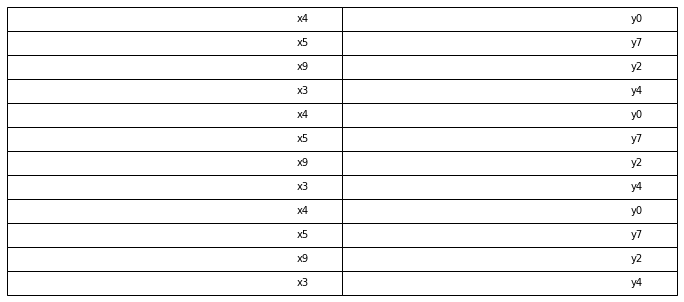

In [21]:
res = rec(0, [i for i in range(n)])
print("Для вершин с уникальной степенью сразу можно установить соответствие:\t")

def draw(H):
    fig, ax = plt.subplots(1,1)
    ax.axis('tight')
    ax.axis('off')
    table = plt.table(cellText=H, loc="center")
    table.scale(2, 2)
    plt.show()
draw(BT)

Переберем всевозможные комбинации связей оставшихся вершин и получим соответствие 


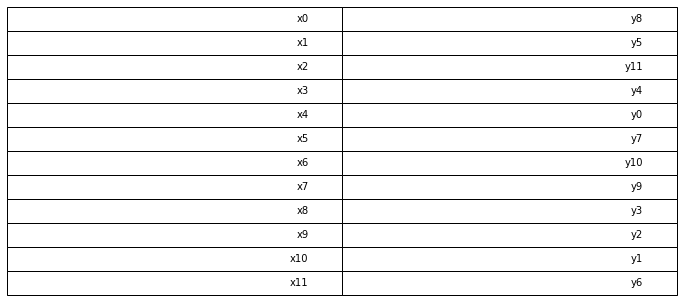

In [24]:
print("Переберем всевозможные комбинации связей оставшихся вершин и получим соответствие ")
C = []
CT = []

for i, r in enumerate(res):
    if len(G[i]) != 1:
        C.append((i, r))
        CT.append((f"x{i}", f"y{r}"))
draw(CT)

In [25]:
print("У каждой вершины графа1 есть соответствующая вершина графа2, можно утверждать" +
     ", что эти графы изоморфны")

У каждой вершины графа1 есть соответствующая вершина графа2, можно утверждать, что эти графы изоморфны
